<a href="https://colab.research.google.com/github/enessibest/KNN-Naive-bayes/blob/main/K_NN_and_NB_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#uploading the data set
data = pd.read_csv('/content/ortho_knnnb.csv')

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.shape

(310, 7)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt numeric,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [8]:
#checking for missing values
missing_value = data.isna().sum()
missing_value

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [9]:
#ploting correlation 
data_corr= data.corr()
data_corr

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
pelvic_tilt numeric,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


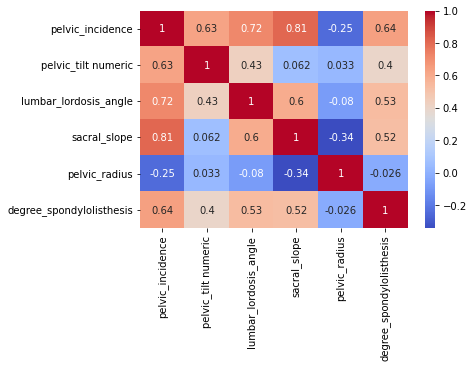

In [10]:
sns.heatmap(data_corr, annot=True, cmap="coolwarm")
plt.show()

##Preparing data for modelling 

In [11]:

X = data.drop(['class'], axis=1)
Y = data['class']


#training data on KNN Classify

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [20]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
pred = knn.predict(X_test)
pred

array(['Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Normal',
       'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Normal', 'Normal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal'], dtype=object)

In [24]:
print('The accuracy of the KNN with K=3 is {}%'.format(round(accuracy_score(pred,Y_test)*100,2)))


The accuracy of the KNN with K=3 is 88.71%


##Using Naive Bayes model

In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [26]:
pred_nb = model.predict(X_test)
pred_nb

array(['Abnormal', 'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Normal', 'Abnormal',
       'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal'], dtype='<U8')

In [28]:
print('The accuracy of NB is {}%'.format(round(accuracy_score(pred_nb,Y_test)*100,2)))


The accuracy of NB is 77.42%


#In this project, KNN gives better accuracy score than Naive bayes